### Import all needed modules

In [1]:
from image import loadImage, loadImages, plotShapes, plotData, Mask
from CapSol import Laplace
from folder import Folder
import matplotlib.pyplot as plt
import numpy as np
from ai import NN

### Load numbered images from a folder and apply a filter for .jpg files

In [2]:
folder = Folder("exampleData/Drenckhan/02/")
folder.filterFiles("*.jpg")

### Setting up a mask for the first image to get a proper detection  (optional)

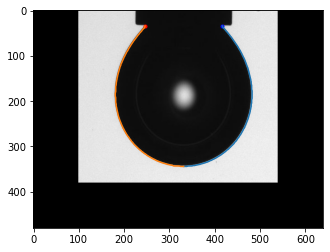

In [3]:
mask = Mask(100, 100, 0, 100)
shape = loadImage(folder.files[0], flip=True, mask=mask, verbose=True)

In [4]:
# Load the images and process them into a proper parametrization
shapes = loadImages(folder.files[:-2], flip=True, mask=mask)

### Fit shapes via numerical Laplace shape fitting

In [5]:
# The actual fit
laplaceFits = [Laplace(shape) for shape in shapes]

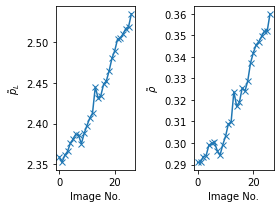

In [6]:
# Extracting and plotting the control parameters
p_L, rho, area, volume = np.array([[fit.p_L,
                                    fit.rho,
                                    fit.area,
                                    fit.volume] for fit in laplaceFits]).T

fig, ax = plt.subplots(1,2,figsize=(4,3))
plotData(ax[0], y=p_L, xlabel="Image No.", ylabel=r"$\tilde{p}_L$")
plotData(ax[1], y=rho, xlabel="Image No.", ylabel=r"$\tilde{\rho}$")
plt.tight_layout()

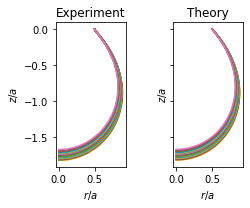

In [7]:
# Generating and plotting the fitted shapes from theory
fittedShapes = [fit.shape for fit in laplaceFits]

fig, ax = plt.subplots(1,2,figsize=(4,3), sharey=True)
ax[0].set_title("Experiment")
ax[1].set_title("Theory")
plotShapes(ax[0], shapes)
plotShapes(ax[1], fittedShapes)
plt.tight_layout()